In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
import pandas as pd
from scipy import stats
import dabest

C:\Users\Can\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ca1_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\delay_lap summary\CA1\CA1_f_shift_new.mat'
ca3_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\delay_lap summary\CA3\CA3_f_shift_new.mat'

In [3]:
CA1_fn_dist_data = scipy.io.loadmat(ca1_fn_dist_fp)
CA3_fn_dist_data = scipy.io.loadmat(ca3_fn_dist_fp)
#dist_data['f_bincounts'][0]
CA1_fn_dist_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jun  3 11:53:47 2020',
 '__version__': '1.0',
 '__globals__': [],
 'f_shift_dist_M': array([[ 0.01276757, -0.01975257, -0.02142996, ..., -0.00190367,
          0.03833713, -0.0080098 ]]),
 'n_shift_dist_M': array([[ 0.02102107, -0.00472011, -0.00540264, ..., -0.061143  ,
          0.00799407,  0.0059656 ]]),
 'total_f_act_shift': array([[ 0.02295145,  0.00651974, -0.00128485, ...,  0.01056187,
          0.02952168,  0.0165704 ]]),
 'total_n_act_shift': array([[-0.05422369, -0.02915933,  0.01490274, ...,  0.29401348,
          0.17358996,  0.01718604]])}

In [22]:
for t in range(6):
    print(t)
    if t==0:
        new_pd_dict = [{'cor': -CA1_fn_dist_data['total_n_act_shift'][0][i], 'type':'CA1'} for i in range(len(CA1_fn_dist_data['total_n_act_shift'][0]))]# for j in range(N_trial)]
    elif t==1:
        new_pd_dict += [{'cor': -CA3_fn_dist_data['total_n_act_shift'][0][i], 'type':'CA3'} for i in range(len( CA3_fn_dist_data['total_n_act_shift'][0]))]
        
    new_pd_result = pd.DataFrame(new_pd_dict)   

0
1
2
3
4
5


DABEST v0.3.0
             
Good afternoon!
The current time is Sat Jun  6 17:44:27 2020.

The unpaired mean difference between CA1 and CA3 is 0.0178 [95%CI 0.01, 0.025].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

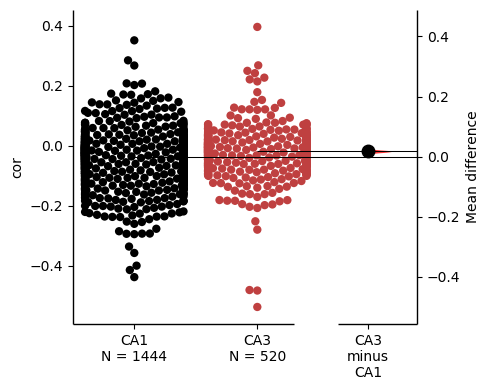

In [23]:
dist_dabest = dabest.load(data=new_pd_result, x="type", y="cor",
                          idx=("CA1", "CA3"))

# Produce a Cumming estimation plot.
dist_dabest.mean_diff.plot(custom_palette=["black","red"]);

plt.savefig('CA1_CA3_n_shift_dabest.svg')
dist_dabest.mean_diff

In [5]:
distbins=np.arange(-0.51,0.51,0.02)
print(distbins)

[-0.51 -0.49 -0.47 -0.45 -0.43 -0.41 -0.39 -0.37 -0.35 -0.33 -0.31 -0.29
 -0.27 -0.25 -0.23 -0.21 -0.19 -0.17 -0.15 -0.13 -0.11 -0.09 -0.07 -0.05
 -0.03 -0.01  0.01  0.03  0.05  0.07  0.09  0.11  0.13  0.15  0.17  0.19
  0.21  0.23  0.25  0.27  0.29  0.31  0.33  0.35  0.37  0.39  0.41  0.43
  0.45  0.47  0.49]


In [6]:
len(CA1_fn_dist_data['f_shift_dist_M'][0])
print(np.mean(CA1_fn_dist_data['f_shift_dist_M']))
np.mean(np.var(CA1_fn_dist_data['f_shift_dist_M'],1))

-0.000577209688849086


0.0004689488252096492

f_shuffle Ks_2sampResult(statistic=0.3145025295109612, pvalue=3.1755202213049092e-52)
f_mean= 0.018300331065942806
shuffle_mean= -0.00011736518733725271
f_var= 0.002161752099071967
shuffle_var= 0.0006291759003012476
f_skewness= 0.6219952610798595
shuffle_skewness= -0.15123333214005064


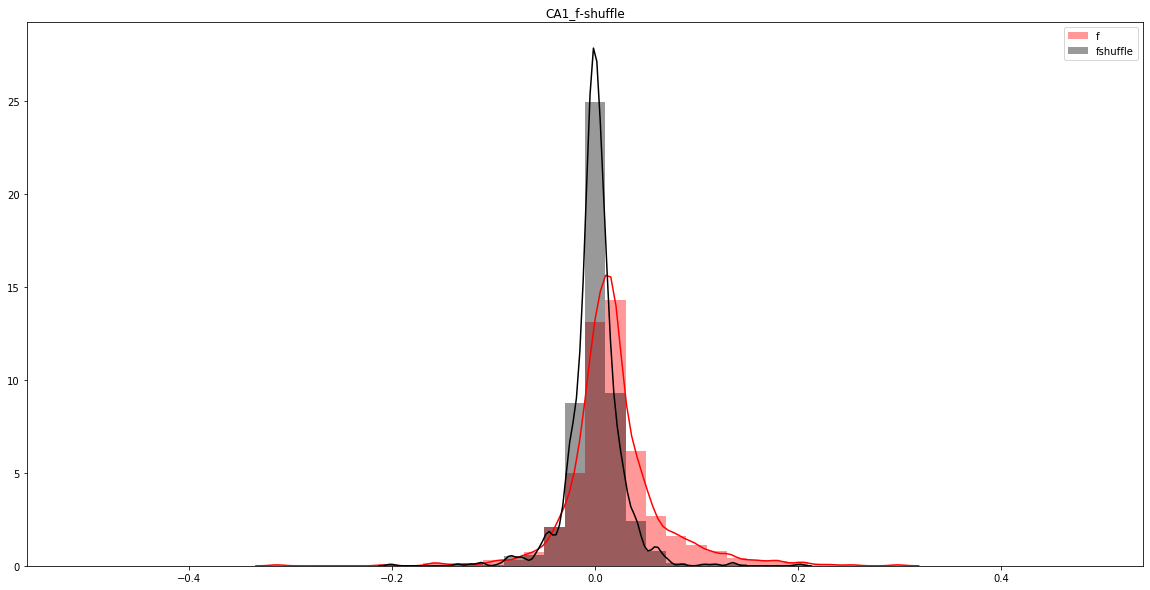

In [53]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA1_fn_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='f',color='red')
ax = sns.distplot(CA1_fn_dist_data['f_shift_dist_M'][0],bins=distbins,norm_hist=True,label='fshuffle',color='black')
ax.legend()
ax.set_title('CA1_f-shuffle')
#print(stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('f_shuffle',stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_fn_dist_data['f_shift_dist_M'][0]))
print('f_mean=',np.mean(CA1_fn_dist_data['total_f_act_shift'][0]))
print('shuffle_mean=',np.mean(CA1_fn_dist_data['f_shift_dist_M']))
print('f_var=',np.var(CA1_fn_dist_data['total_f_act_shift'][0]))
print('shuffle_var=',np.mean(np.var(CA1_fn_dist_data['f_shift_dist_M'],1)))
print('f_skewness=',stats.skew(CA1_fn_dist_data['total_f_act_shift'][0]))
print('shuffle_skewness=',stats.skew(CA1_fn_dist_data['f_shift_dist_M'][0]))
#print('f_shuffle',stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_fn_dist_data['f_shift_dist_M'][0]))

n_shuffle Ks_2sampResult(statistic=0.39906832298136646, pvalue=3.4079539672268946e-46)
n_mean= 1.5977846181682718
shuffle_mean= -0.004581943402064232
n_var= 7.74380957820193
shuffle_var= 2.9743996858496953
n_skewness= 0.7732651659643186
shuffle_skewness= 0.33866643362220417


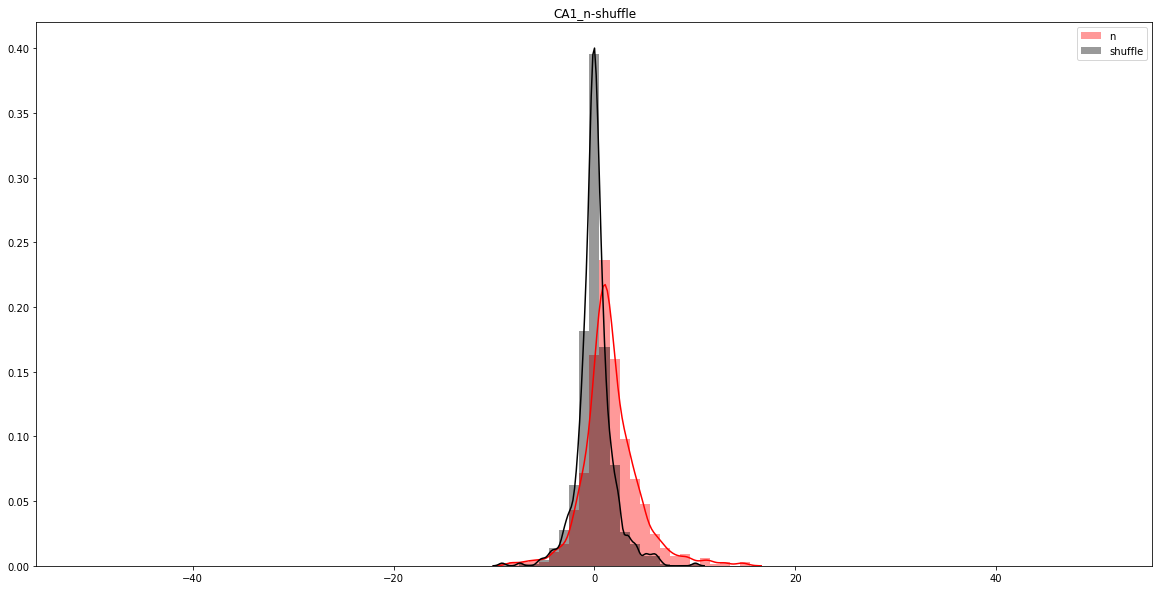

In [49]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA1_fn_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='n',color='red')
ax = sns.distplot(CA1_fn_dist_data['n_shift_dist_M'][0],bins=distbins,norm_hist=True,label='shuffle',color='black')
ax.legend()
ax.set_title('CA1_n-shuffle')
#print(stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('n_shuffle',stats.ks_2samp(CA1_fn_dist_data['total_n_act_shift'][0], CA1_fn_dist_data['n_shift_dist_M'][0]))
print('n_mean=',np.mean(CA1_fn_dist_data['total_n_act_shift'][0]))
print('shuffle_mean=',np.mean(CA1_fn_dist_data['n_shift_dist_M']))
print('n_var=',np.var(CA1_fn_dist_data['total_n_act_shift'][0]))
print('shuffle_var=',np.mean(np.var(CA1_fn_dist_data['n_shift_dist_M'],1)))
print('n_skewness=',stats.skew(CA1_fn_dist_data['total_n_act_shift'][0]))
print('shuffle_skewness=',stats.skew(CA1_fn_dist_data['n_shift_dist_M'][0]))
#print('f_shuffle',stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_fn_dist_data['f_shift_dist_M'][0]))

Ks_2sampResult(statistic=0.23523946409321903, pvalue=2.3314683517128287e-15)
f_mean= 0.7682279987885331
f_var= 4.761318586493556
f_skewness= 0.2454449448992192
n_mean= 1.5977846181682718
n_var= 7.74380957820193
n_skewness= 0.7732651659643186


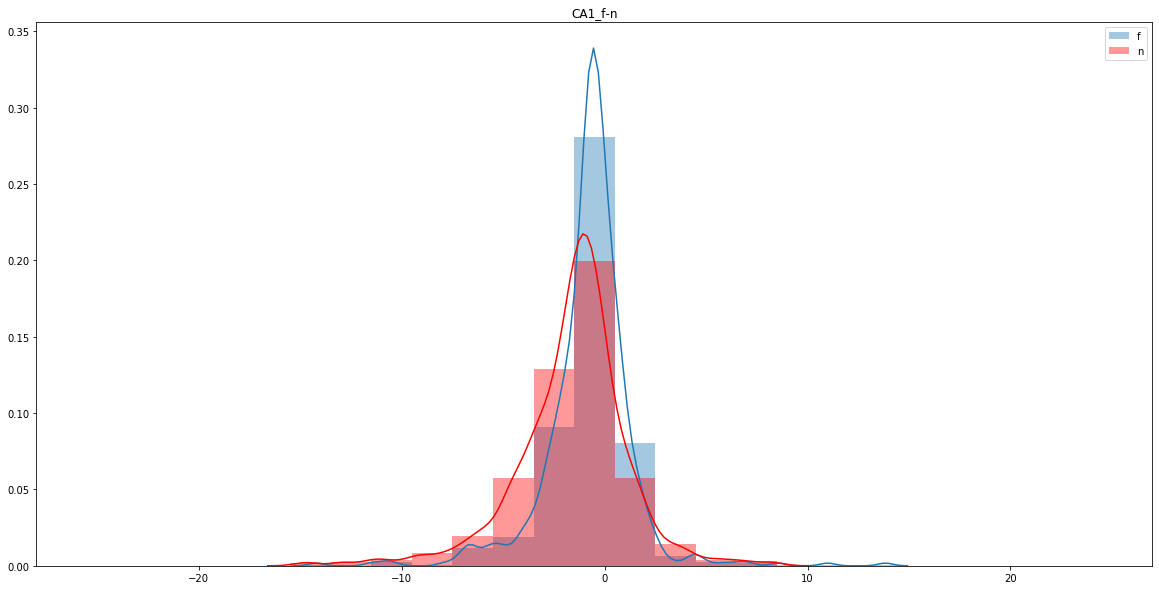

In [19]:
plt.figure(figsize=(20,10))
ax = sns.distplot(-CA1_fn_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='f')#,color='blue')
ax = sns.distplot(-CA1_fn_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='n',color='red')
ax.legend()
ax.set_title('CA1_f-n')
print(stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('f_mean=',np.mean(CA1_fn_dist_data['total_f_act_shift'][0]))
print('f_var=',np.var(CA1_fn_dist_data['total_f_act_shift'][0]))
print('f_skewness=',stats.skew(CA1_fn_dist_data['total_f_act_shift'][0]))
print('n_mean=',np.mean(CA1_fn_dist_data['total_n_act_shift'][0]))
print('n_var=',np.var(CA1_fn_dist_data['total_n_act_shift'][0]))
print('n_skewness=',stats.skew(CA1_fn_dist_data['total_n_act_shift'][0]))



f_shuffle Ks_2sampResult(statistic=0.1532567049808429, pvalue=0.004298546381816577)
f_mean= -0.07278944940991322
shuffle_mean= -0.00030014800698103795
f_var= 1.3278281103781946
shuffle_var= 0.5779965645237355
f_skewness= -0.7099098679162557
shuffle_skewness= 2.135016264576469


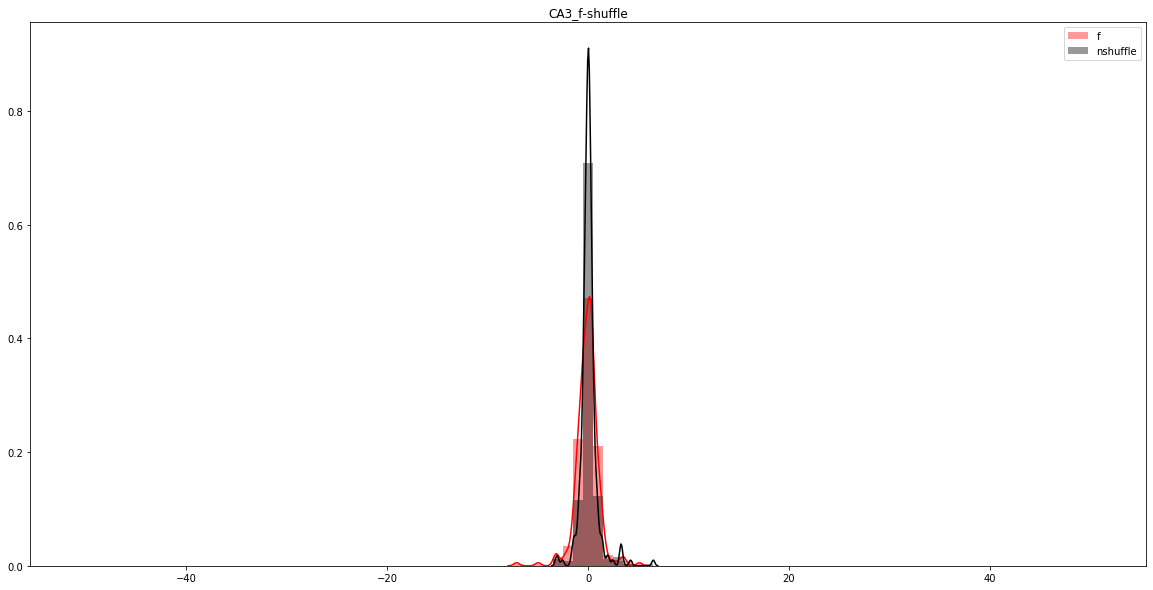

In [86]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA3_fn_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='f',color='red')
ax = sns.distplot(CA3_fn_dist_data['f_shift_dist_M'][0],bins=distbins,norm_hist=True,label='nshuffle',color='black')
ax.legend()
ax.set_title('CA3_f-shuffle')
#print(stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('f_shuffle',stats.ks_2samp(CA3_fn_dist_data['total_f_act_shift'][0], CA3_fn_dist_data['f_shift_dist_M'][0]))
print('f_mean=',np.mean(CA3_fn_dist_data['total_f_act_shift'][0]))
print('shuffle_mean=',np.mean(CA3_fn_dist_data['f_shift_dist_M']))
print('f_var=',np.var(CA3_fn_dist_data['total_f_act_shift'][0]))
print('shuffle_var=',np.mean(np.var(CA3_fn_dist_data['f_shift_dist_M'],1)))
print('f_skewness=',stats.skew(CA3_fn_dist_data['total_f_act_shift'][0]))
print('shuffle_skewness=',stats.skew(CA3_fn_dist_data['f_shift_dist_M'][0]))

In [13]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA3_fn_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='n',color='red')
ax = sns.distplot(CA3_fn_dist_data['n_shift_dist_M'][0],bins=distbins,norm_hist=True,label='shuffle',color='black')
ax.legend()
ax.set_title('CA3_n-shuffle')
#print(stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('n_shuffle',stats.ks_2samp(CA3_fn_dist_data['total_n_act_shift'][0], CA3_fn_dist_data['n_shift_dist_M'][0]))
print('n_mean=',np.mean(CA3_fn_dist_data['total_n_act_shift'][0]))
print('shuffle_mean=',np.mean(CA3_fn_dist_data['n_shift_dist_M']))
print('n_var=',np.var(CA3_fn_dist_data['total_n_act_shift'][0]))
print('shuffle_var=',np.mean(np.var(CA3_fn_dist_data['n_shift_dist_M'],1)))
print('n_skewness=',stats.skew(CA3_fn_dist_data['total_n_act_shift'][0]))
print('shuffle_skewness=',stats.skew(CA3_fn_dist_data['n_shift_dist_M'][0]))

NameError: name 'distbins' is not defined

<Figure size 1440x720 with 0 Axes>

Ks_2sampResult(statistic=0.3036137578433651, pvalue=1.9984014443252818e-15)
f_mean= -0.0001783387666621008
f_var= 0.0005300390435390595
f_skewness= -0.3122262365087974
n_mean= 0.016878231276678514
n_var= 0.005655914397894944
n_skewness= 1.1681853319527968


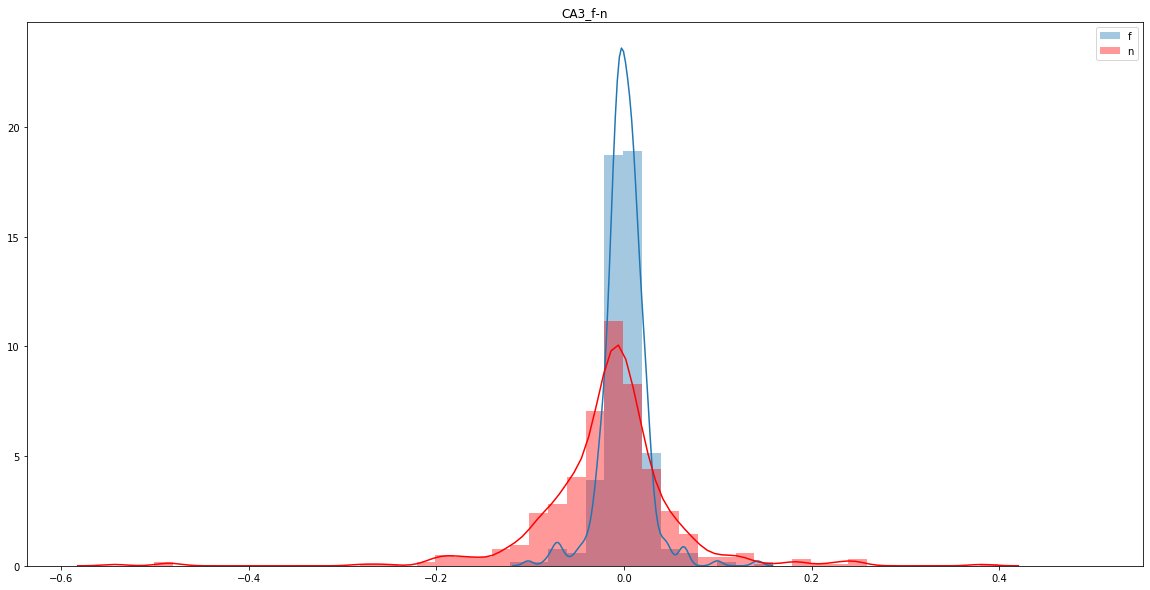

In [31]:
plt.figure(figsize=(20,10))
ax = sns.distplot(-CA3_fn_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='f')#,color='blue')
ax = sns.distplot(-CA3_fn_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='n',color='red')
ax.legend()
ax.set_title('CA3_f-n')
print(stats.ks_2samp(CA3_fn_dist_data['total_f_act_shift'][0], CA3_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('f_mean=',np.mean(CA3_fn_dist_data['total_f_act_shift'][0]))
print('f_var=',np.var(CA3_fn_dist_data['total_f_act_shift'][0]))
print('f_skewness=',stats.skew(CA3_fn_dist_data['total_f_act_shift'][0]))
print('n_mean=',np.mean(CA3_fn_dist_data['total_n_act_shift'][0]))
print('n_var=',np.var(CA3_fn_dist_data['total_n_act_shift'][0]))
print('n_skewness=',stats.skew(CA3_fn_dist_data['total_n_act_shift'][0]))

Ks_2sampResult(statistic=0.31957683548753585, pvalue=9.992007221626409e-16)
CA1_mean= 0.01781023198084071
CA1_var= 0.0020152513311874763
CA1_skewness= 0.6633199817671371
CA3_mean= -0.0001783387666621008
CA3_var= 0.0005300390435390595
CA3_skewness= -0.3122262365087974


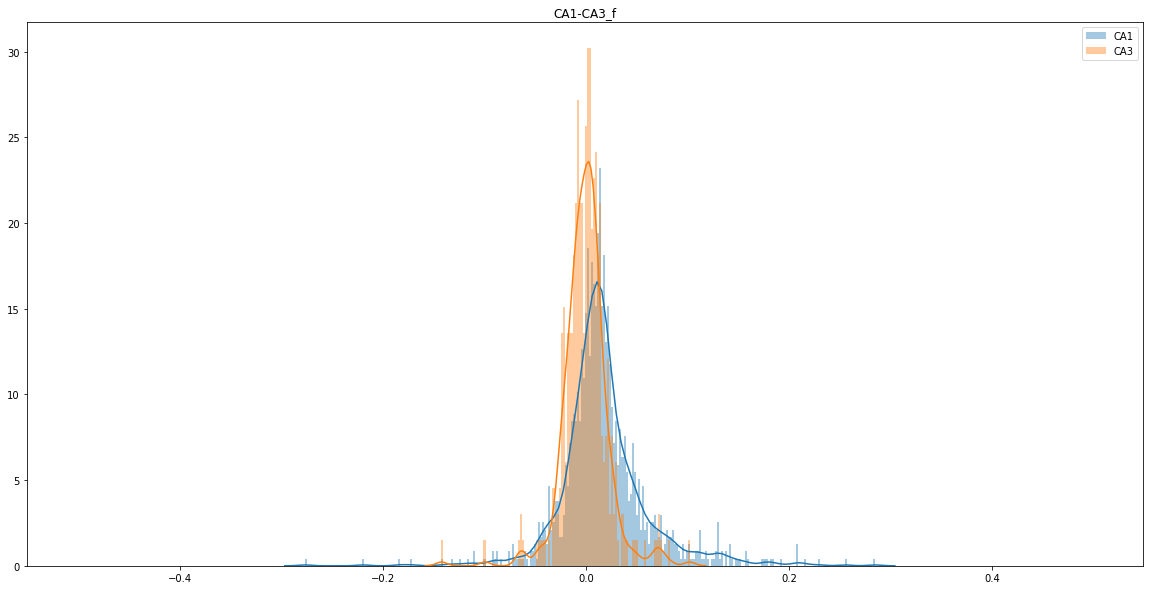

In [33]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA1_fn_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='CA1')
ax = sns.distplot(CA3_fn_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='CA3')
ax.legend()
ax.set_title('CA1-CA3_f')
print(stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA3_fn_dist_data['total_f_act_shift'][0]))
print('CA1_mean=',np.mean(CA1_fn_dist_data['total_f_act_shift'][0]))
print('CA1_var=',np.var(CA1_fn_dist_data['total_f_act_shift'][0]))
print('CA1_skewness=',stats.skew(CA1_fn_dist_data['total_f_act_shift'][0]))
print('CA3_mean=',np.mean(CA3_fn_dist_data['total_f_act_shift'][0]))
print('CA3_var=',np.var(CA3_fn_dist_data['total_f_act_shift'][0]))
print('CA3_skewness=',stats.skew(CA3_fn_dist_data['total_f_act_shift'][0]))

In [55]:
def plot_shift_dist(data1,data2,distbins,label1,label2):
    plt.figure(figsize=(8,5))
    ca1_len = len(data1)
    ca3_len = len(data2)
    ax2 = sns.distplot(-data1,bins=distbins,hist=True, 
                       hist_kws={'weights': np.ones(ca1_len) / ca1_len}, 
                       kde=False,label=label1,color='red')
    ax2 = sns.distplot(-data2,bins=distbins,hist=True, 
                       hist_kws={'weights': np.ones(ca3_len) / ca3_len},
                       kde=False, label=label2,color='black')
    sns.despine()
    
    plt.figure(figsize=(8,5))
    ax = sns.distplot(-data1,bins=distbins,label=label1,color='red')
    ax = sns.distplot(-data2,bins=distbins,label=label2,color='black')
    sns.despine()
    print(stats.ks_2samp(data1, data2))            
    return ax,ax2

Ks_2sampResult(statistic=0.3808864265927978, pvalue=1.0409085460192469e-93)


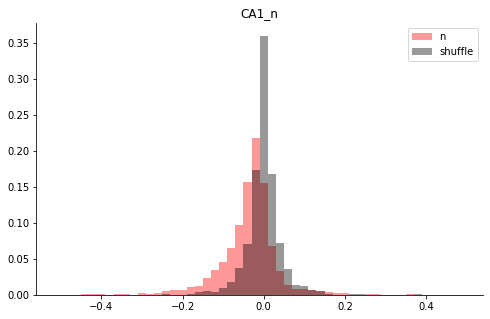

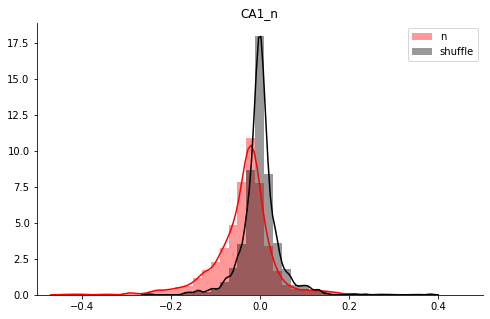

In [57]:
distbins=np.arange(-0.51,0.51,0.02)
data1=CA1_fn_dist_data['total_n_act_shift'][0]
data2=CA1_fn_dist_data['n_shift_dist_M'][0]

label1='n'
label2='shuffle'
ax,ax2=plot_shift_dist(data1,data2,distbins,label1,label2)
ax2.legend()
ax2.set_title('CA1_n')
ax2.figure.savefig('CA1_n_shift_dist.svg')
#plt.figure(figsize=(8,5))
#ax = sns.distplot(-data1,bins=distbins,label=label1)
#ax = sns.distplot(-data2,bins=distbins,label=label2)
ax.legend()
ax.set_title('CA1_n')
ax.set_xlim(-0.501,0.501)

ax.figure.savefig('CA1_n_shift_dist_curve.svg')

Ks_2sampResult(statistic=0.19057106328574472, pvalue=1.262545623603728e-12)
CA1_mean= 0.035671435853251096
CA1_var= 0.004443156215258349
CA1_skewness= 0.5639499082017086
CA3_mean= 0.016878231276678514
CA3_var= 0.005655914397894944
CA3_skewness= 1.1681853319527968


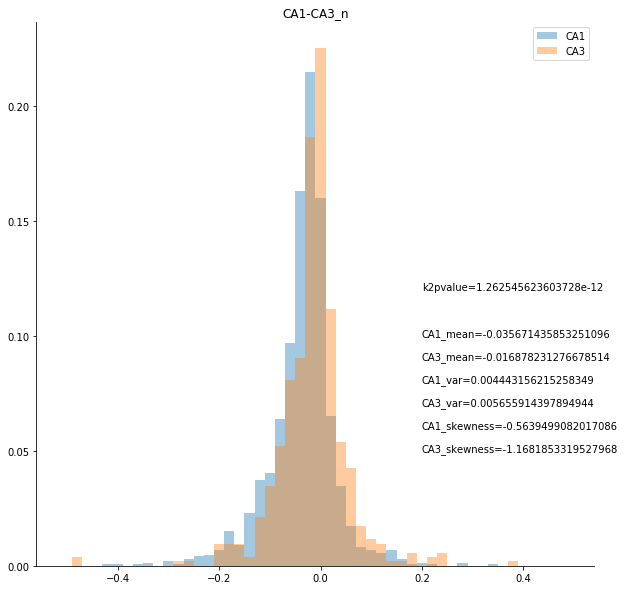

In [8]:
plt.figure(figsize=(10,10))
bin_diff = distbins[1] - distbins[0]
ca1_len = len(CA1_fn_dist_data['total_n_act_shift'][0])
ca3_len = len(CA3_fn_dist_data['total_n_act_shift'][0])
ax2 = sns.distplot(-CA1_fn_dist_data['total_n_act_shift'][0],bins=distbins,hist=True, 
                   hist_kws={'weights': np.ones(ca1_len) / ca1_len}, 
                   kde=False,label='CA1')
ax2 = sns.distplot(-CA3_fn_dist_data['total_n_act_shift'][0],bins=distbins,hist=True, 
                   hist_kws={'weights': np.ones(ca3_len) / ca3_len},
                   kde=False, label='CA3')
ax2.legend()
ax2.set_title('CA1-CA3_n')
sns.despine()
ax2.text(0.2,0.12,'k2pvalue='+str(stats.ks_2samp(CA1_fn_dist_data['total_n_act_shift'][0], CA3_fn_dist_data['total_n_act_shift'][0])[1]))
ax2.text(0.2,0.1,'CA1_mean='+str(np.mean(-CA1_fn_dist_data['total_n_act_shift'][0])))
ax2.text(0.2,0.09,'CA3_mean='+str(np.mean(-CA3_fn_dist_data['total_n_act_shift'][0])))
ax2.text(0.2,0.08,'CA1_var='+str(np.var(-CA1_fn_dist_data['total_n_act_shift'][0])))
ax2.text(0.2,0.07,'CA3_var='+str(np.var(-CA3_fn_dist_data['total_n_act_shift'][0])))
ax2.text(0.2,0.06,'CA1_skewness='+str(stats.skew(-CA1_fn_dist_data['total_n_act_shift'][0])))
ax2.text(0.2,0.05,'CA3_skewness='+str(stats.skew(-CA3_fn_dist_data['total_n_act_shift'][0])))
print(stats.ks_2samp(CA1_fn_dist_data['total_n_act_shift'][0], CA3_fn_dist_data['total_n_act_shift'][0]))
print('CA1_mean=',np.mean(CA1_fn_dist_data['total_n_act_shift'][0]))
print('CA1_var=',np.var(-CA1_fn_dist_data['total_n_act_shift'][0]))
print('CA1_skewness=',stats.skew(CA1_fn_dist_data['total_n_act_shift'][0]))
print('CA3_mean=',np.mean(CA3_fn_dist_data['total_n_act_shift'][0]))
print('CA3_var=',np.var(CA3_fn_dist_data['total_n_act_shift'][0]))
print('CA3_skewness=',stats.skew(CA3_fn_dist_data['total_n_act_shift'][0]))

#plt.savefig('CA1-CA3_n_shift_dist.svg')

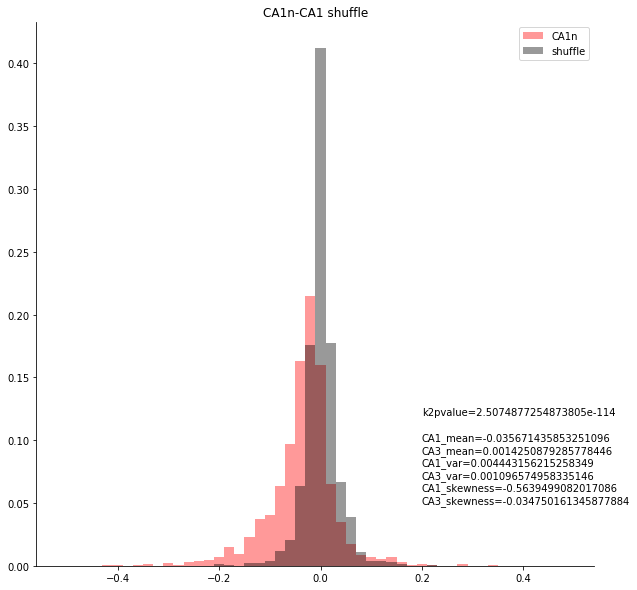

In [21]:
plt.figure(figsize=(10,10))
bin_diff = distbins[1] - distbins[0]
data1=-CA1_fn_dist_data['total_n_act_shift']
data2=-CA1_fn_dist_data['n_shift_dist_M']

#ax = sns.distplot(CA3_fn_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='n',color='red')
#ax = sns.distplot(CA3_fn_dist_data['n_shift_dist_M'][0],bins=distbins,norm_hist=True,label='shuffle',color='black')

ca1_len = len(data1[0])
ca3_len = len(data2[0])
ax2 = sns.distplot(data1[0],bins=distbins,hist=True, 
                   hist_kws={'weights': np.ones(ca1_len) / ca1_len}, 
                   kde=False,label='CA1n',color='red')
ax2 = sns.distplot(data2[0],bins=distbins,hist=True, 
                   hist_kws={'weights': np.ones(ca3_len) / ca3_len},
                   kde=False, label='shuffle',color='black')
ax2.legend()
ax2.set_title('CA1n-CA1 shuffle')
sns.despine()
ax2.text(0.2,0.12,'k2pvalue='+str(stats.ks_2samp(data1[0], data2[0])[1]))
ax2.text(0.2,0.1,'CA1_mean='+str(np.mean(data1[0])))
ax2.text(0.2,0.09,'CA3_mean='+str(np.mean(data2[0])))
ax2.text(0.2,0.08,'CA1_var='+str(np.var(data1[0])))
ax2.text(0.2,0.07,'CA3_var='+str(np.var(data2[0])))
ax2.text(0.2,0.06,'CA1_skewness='+str(stats.skew(data1[0])))
ax2.text(0.2,0.05,'CA3_skewness='+str(stats.skew(data2[0])))
#print(stats.ks_2samp(CA1_fn_dist_data['total_n_act_shift'][0], CA3_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_mean=',np.mean(CA1_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_var=',np.var(-CA1_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_skewness=',stats.skew(CA1_fn_dist_data['total_n_act_shift'][0]))
#print('CA3_mean=',np.mean(CA3_fn_dist_data['total_n_act_shift'][0]))
#print('CA3_var=',np.var(CA3_fn_dist_data['total_n_act_shift'][0]))
#print('CA3_skewness=',stats.skew(CA3_fn_dist_data['total_n_act_shift'][0]))

plt.savefig('CA1_n_shuffle_shift_dist.svg')

In [13]:
a=len(CA3_fn_dist_data['total_n_act_shift'][0])
b=len(CA3_fn_dist_data['total_n_act_shift'][0][CA3_fn_dist_data['total_n_act_shift'][0]>0.01])
c=len(CA3_fn_dist_data['total_n_act_shift'][0][CA3_fn_dist_data['total_n_act_shift'][0]<=-0.01])
print(b/a)
print(c/a)
print(1-c/a-b/a)

0.5076923076923077
0.2673076923076923
0.2250000000000001


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00084317, 0.        , 0.00084317, 0.00084317, 0.00337268,
        0.00252951, 0.00252951, 0.0084317 , 0.01264755, 0.01602024,
        0.02360877, 0.04047218, 0.08010118, 0.1703204 , 0.3381113 ,
        0.18887015, 0.06070826, 0.02529511, 0.01011804, 0.00505902,
        0.00337268, 0.00168634, 0.00084317, 0.00084317, 0.00084317,
        0.        , 0.00084317, 0.        , 0.00084317, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([-0.501, -0.481, -0.461, -0.441, -0.421, -0.401, -0.381, -0.361,
        -0.341, -0.321, -0.301, -0.281, -0.261, -0.241, -0.221, -0.201,
        -0.181, -0.161, -0.141, -0.121, -0.101, -0.081, -0.061, -0.041,
        -0.021, -0.001,  0.019,  0.039,  0.059,  0.079,  0.099,  0.119,
         0.139,  0.159,  0.179

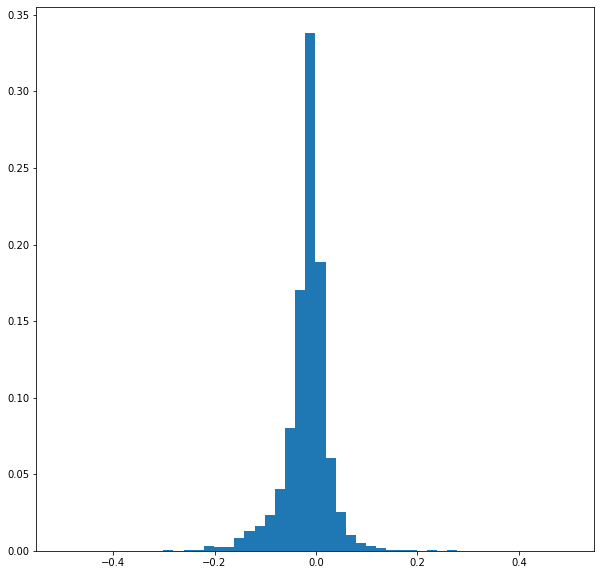

In [24]:
plt.figure(figsize=(10,10))
distbins=np.arange(-0.501, 0.501, 0.02)
data = -CA1_fn_dist_data['total_f_act_shift'][0]
plt.hist(-CA1_fn_dist_data['total_f_act_shift'][0], bins=distbins, weights=np.ones_like(data)/len(data))
#ax2 = sns.distplot(-CA1_fn_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=False,label='CA1')
#ax2 = sns.distplot(-CA3_fn_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=False,label='CA3')
#=#ax2.legend()
#ax2.set_title('CA1-CA3_n')

In [41]:
ca3_2day_fp=r'D:\DATA\analysis\15lapstandarded\CA3novel2day\mean_Matrix\CA3_n2day_shift_new.mat'
ca1_2day_fp=r'D:\DATA\analysis\15lapstandarded\CA1novel2day_correlation\CA1_n2day_shift.mat'
CA1_2day_dist_data = scipy.io.loadmat(ca1_2day_fp)
CA3_2day_dist_data = scipy.io.loadmat(ca3_2day_fp)

In [61]:
CA1_2day_dist_data


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Feb 24 22:36:20 2020',
 '__version__': '1.0',
 '__globals__': [],
 'f_shift_dist_M': array([[-0.202207  ,  0.88152189, -0.24710154, ..., -1.08243109,
         -1.5040181 ,  0.17393588],
        [-0.20689394,  0.63169705,  0.27922085, ..., -1.98087017,
          0.36457802, -0.14284706],
        [-0.78287158,  0.65744395,  0.48470026, ..., -0.23375586,
          1.40740534, -0.5555993 ],
        ...,
        [-0.64065   , -1.02145341, -0.21412527, ...,  4.34660624,
          0.2581632 , -0.29283619],
        [-0.4011681 , -0.24776574,  0.06611051, ..., -4.27321917,
          0.60233432,  0.14635914],
        [ 0.4976552 , -0.38265633, -0.45987724, ..., -0.86800635,
         -0.17567141, -0.74003687]]),
 'n_shift_dist_M': array([[ 0.19937485,  0.05204831, -0.08225443, ...,  0.73640924,
         -1.43284927, -1.51974219],
        [ 1.33667728,  0.11341909,  0.22476399, ...,  0.51675252,
         -1.86262728,  1.28236

day1_shuffle Ks_2sampResult(statistic=0.42984014209591476, pvalue=4.613306411761776e-47)
day1_mean= 1.7851663717653883
shuffle_mean= -0.011146641542305234
day1_var= 9.463725863379018
shuffle_var= 2.487873931883668
day1_skewness= 0.528348787389018
shuffle_skewness= -0.7088468217496958


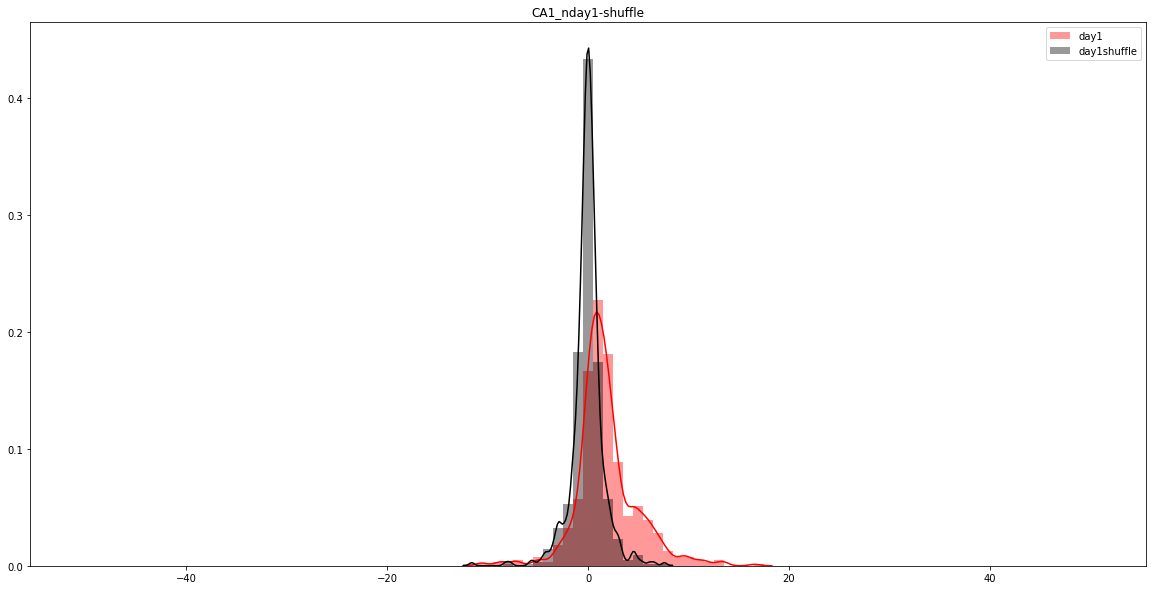

In [65]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA1_2day_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='day1',color='red')
ax = sns.distplot(CA1_2day_dist_data['f_shift_dist_M'][0],bins=distbins,norm_hist=True,label='day1shuffle',color='black')
ax.legend()
ax.set_title('CA1_nday1-shuffle')
#print(stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('day1_shuffle',stats.ks_2samp(CA1_2day_dist_data['total_f_act_shift'][0], CA1_2day_dist_data['f_shift_dist_M'][0]))
print('day1_mean=',np.mean(CA1_2day_dist_data['total_f_act_shift'][0]))
print('shuffle_mean=',np.mean(CA1_2day_dist_data['f_shift_dist_M']))
print('day1_var=',np.var(CA1_2day_dist_data['total_f_act_shift'][0]))
print('shuffle_var=',np.mean(np.var(CA1_2day_dist_data['f_shift_dist_M'],1)))
print('day1_skewness=',stats.skew(CA1_2day_dist_data['total_f_act_shift'][0]))
print('shuffle_skewness=',stats.skew(CA1_2day_dist_data['f_shift_dist_M'][0]))

day2_shuffle Ks_2sampResult(statistic=0.4463157894736842, pvalue=5.895469382914561e-43)
day2_mean= 1.3075889921429649
shuffle_mean= -0.0073539440247017565
day2_var= 4.744660673149237
shuffle_var= 1.5055919591393028
day2_skewness= 1.3613410159505948
shuffle_skewness= 0.13494783320399306


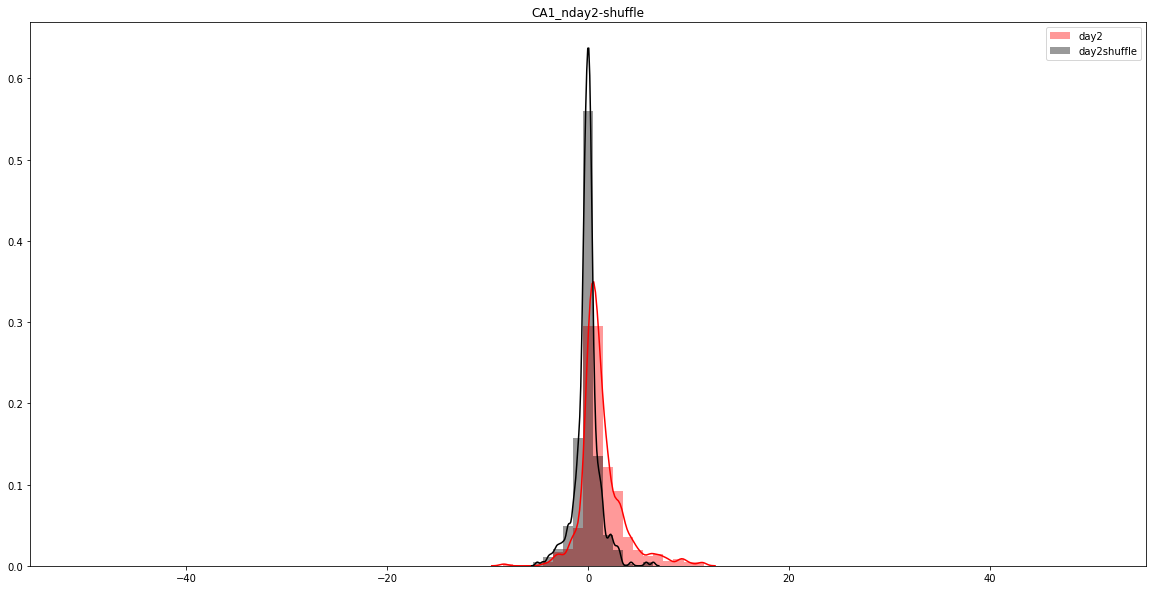

In [64]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA1_2day_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='day2',color='red')
ax = sns.distplot(CA1_2day_dist_data['n_shift_dist_M'][0],bins=distbins,norm_hist=True,label='day2shuffle',color='black')
ax.legend()
ax.set_title('CA1_nday2-shuffle')
#print(stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('day2_shuffle',stats.ks_2samp(CA1_2day_dist_data['total_n_act_shift'][0], CA1_2day_dist_data['n_shift_dist_M'][0]))
print('day2_mean=',np.mean(CA1_2day_dist_data['total_n_act_shift'][0]))
print('shuffle_mean=',np.mean(CA1_2day_dist_data['n_shift_dist_M']))
print('day2_var=',np.var(CA1_2day_dist_data['total_n_act_shift'][0]))
print('shuffle_var=',np.mean(np.var(CA1_2day_dist_data['n_shift_dist_M'],1)))
print('day2_skewness=',stats.skew(CA1_2day_dist_data['total_n_act_shift'][0]))
print('shuffle_skewness=',stats.skew(CA1_2day_dist_data['n_shift_dist_M'][0]))

Ks_2sampResult(statistic=0.15871365803496307, pvalue=3.843278768345115e-06)
day1_mean= 1.7851663717653883
day1_var= 9.463725863379018
day1_skewness= 0.528348787389018
day2_mean= 1.3075889921429649
day2_var= 4.744660673149237
day2_skewness= 1.3613410159505948


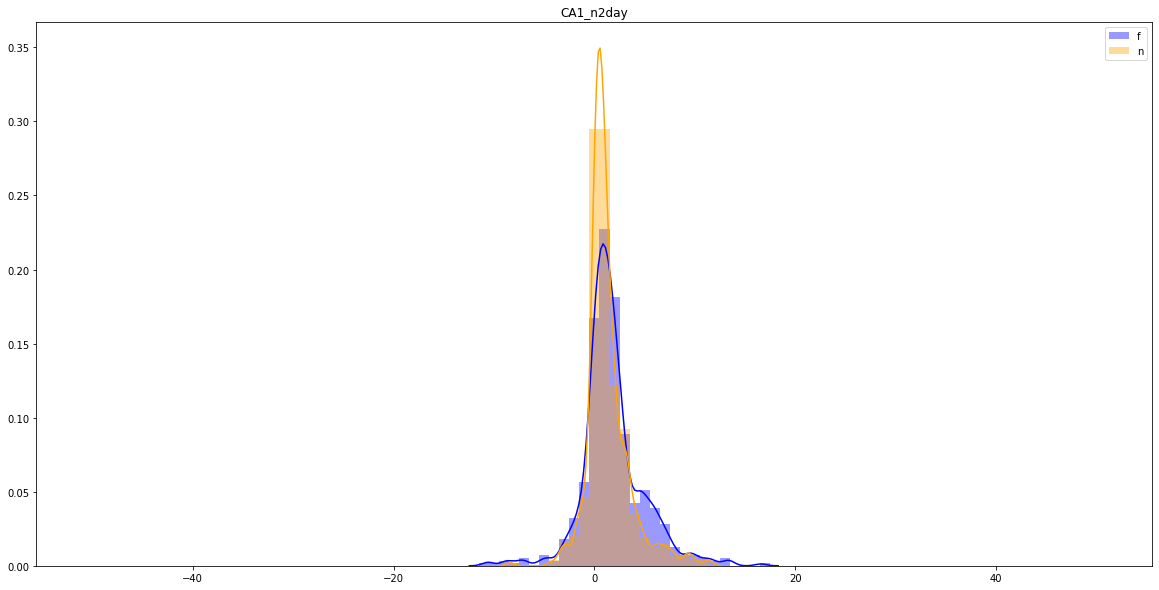

In [67]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA1_2day_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='f',color='blue')
ax = sns.distplot(CA1_2day_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='n',color='orange')
ax.legend()
ax.set_title('CA1_n2day')
print(stats.ks_2samp(CA1_2day_dist_data['total_f_act_shift'][0], CA1_2day_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('day1_mean=',np.mean(CA1_2day_dist_data['total_f_act_shift'][0]))
print('day1_var=',np.var(CA1_2day_dist_data['total_f_act_shift'][0]))
print('day1_skewness=',stats.skew(CA1_2day_dist_data['total_f_act_shift'][0]))
print('day2_mean=',np.mean(CA1_2day_dist_data['total_n_act_shift'][0]))
print('day2_var=',np.var(CA1_2day_dist_data['total_n_act_shift'][0]))
print('day2_skewness=',stats.skew(CA1_2day_dist_data['total_n_act_shift'][0]))

day1_shuffle Ks_2sampResult(statistic=0.27452533603980495, pvalue=3.440457474468417e-07)
day1_mean= 0.6861542231723795
shuffle_mean= -0.013116641602456089
day1_var= 6.696039049563205
shuffle_var= 3.579110084077829
day1_skewness= 0.38594541469780486
shuffle_skewness= 0.5005217739247542


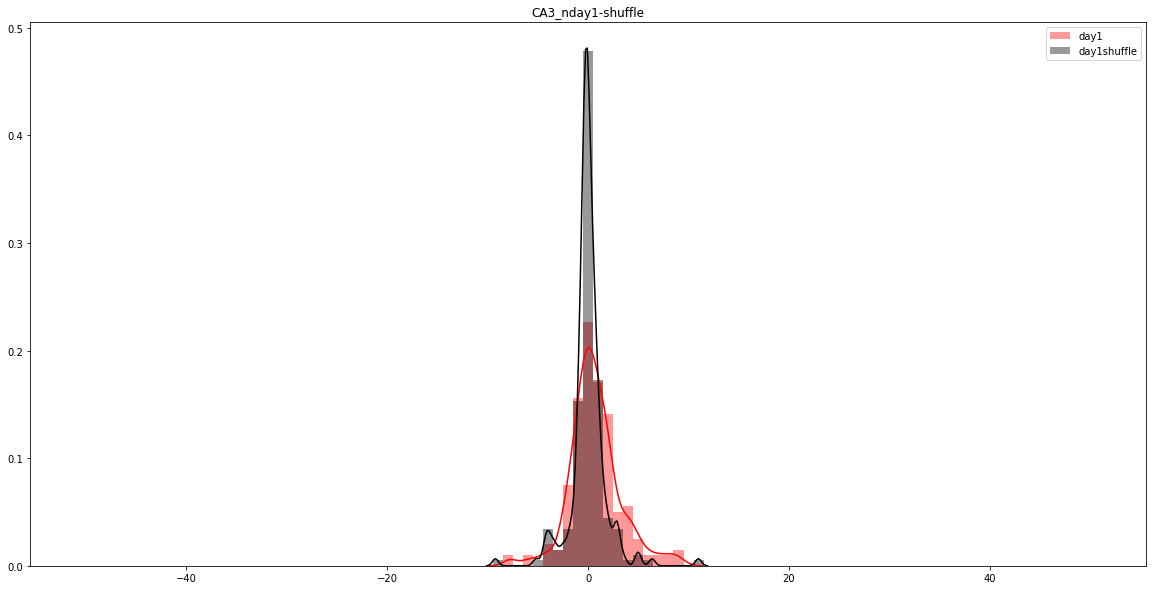

In [87]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA3_2day_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='day1',color='red')
ax = sns.distplot(CA3_2day_dist_data['f_shift_dist_M'][0],bins=distbins,norm_hist=True,label='day1shuffle',color='black')
ax.legend()
ax.set_title('CA3_nday1-shuffle')
#print(stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('day1_shuffle',stats.ks_2samp(CA3_2day_dist_data['total_f_act_shift'][0], CA3_2day_dist_data['f_shift_dist_M'][1]))
print('day1_mean=',np.mean(CA3_2day_dist_data['total_f_act_shift'][0]))
print('shuffle_mean=',np.mean(CA3_2day_dist_data['f_shift_dist_M']))
print('day1_var=',np.var(CA3_2day_dist_data['total_f_act_shift'][0]))
print('shuffle_var=',np.mean(np.var(CA3_2day_dist_data['f_shift_dist_M'],1)))
print('day1_skewness=',stats.skew(CA3_2day_dist_data['total_f_act_shift'][0]))
print('shuffle_skewness=',stats.skew(CA3_2day_dist_data['f_shift_dist_M'][0]))

day2_shuffle Ks_2sampResult(statistic=0.1848730964467005, pvalue=0.001854974697794054)
day2_mean= 0.41930381918830967
shuffle_mean= -0.022585376403721328
day2_var= 4.5136728573435825
shuffle_var= 2.2084389565513014
day2_skewness= 0.45320364453636347
shuffle_skewness= -0.44969007373423736


197

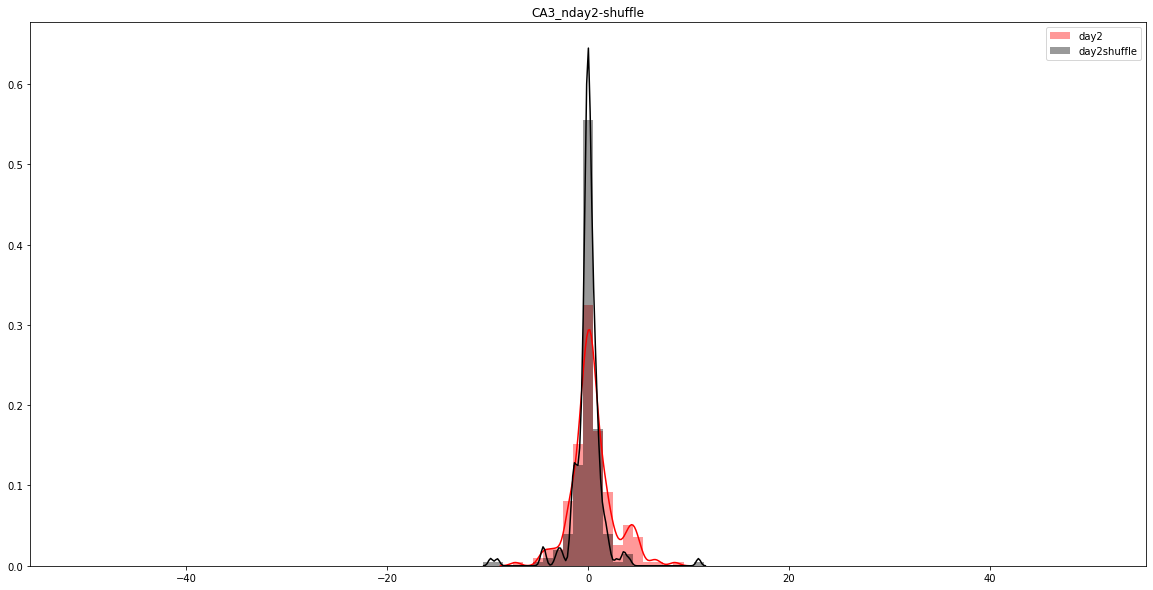

In [76]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA3_2day_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='day2',color='red')
ax = sns.distplot(CA3_2day_dist_data['n_shift_dist_M'][0],bins=distbins,norm_hist=True,label='day2shuffle',color='black')
ax.legend()
ax.set_title('CA3_nday2-shuffle')
#print(stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_fn_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('day2_shuffle',stats.ks_2samp(CA3_2day_dist_data['total_n_act_shift'][0], CA3_2day_dist_data['n_shift_dist_M'][0]))
print('day2_mean=',np.mean(CA3_2day_dist_data['total_n_act_shift'][0]))
print('shuffle_mean=',np.mean(CA3_2day_dist_data['n_shift_dist_M']))
print('day2_var=',np.var(CA3_2day_dist_data['total_n_act_shift'][0]))
print('shuffle_var=',np.mean(np.var(CA3_2day_dist_data['n_shift_dist_M'],1)))
print('day2_skewness=',stats.skew(CA3_2day_dist_data['total_n_act_shift'][0]))
print('shuffle_skewness=',stats.skew(CA3_2day_dist_data['n_shift_dist_M'][0]))


Ks_2sampResult(statistic=0.10779787261178991, pvalue=0.18188179725767006)
day1_mean= 0.6861542231723795
day1_var= 6.696039049563205
day1_skewness= 0.38594541469780486
day2_mean= 0.41930381918830967
day2_var= 4.5136728573435825
day2_skewness= 0.45320364453636347


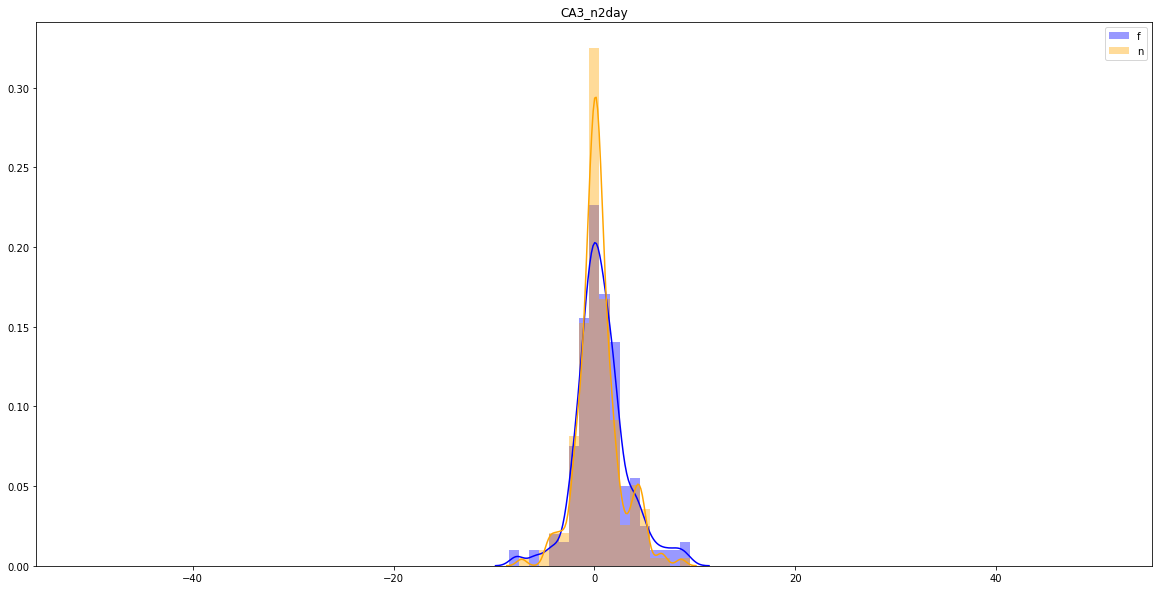

In [77]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA3_2day_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='f',color='blue')
ax = sns.distplot(CA3_2day_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='n',color='orange')
ax.legend()
ax.set_title('CA3_n2day')
print(stats.ks_2samp(CA3_2day_dist_data['total_f_act_shift'][0], CA3_2day_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('day1_mean=',np.mean(CA3_2day_dist_data['total_f_act_shift'][0]))
print('day1_var=',np.var(CA3_2day_dist_data['total_f_act_shift'][0]))
print('day1_skewness=',stats.skew(CA3_2day_dist_data['total_f_act_shift'][0]))
print('day2_mean=',np.mean(CA3_2day_dist_data['total_n_act_shift'][0]))
print('day2_var=',np.var(CA3_2day_dist_data['total_n_act_shift'][0]))
print('day2_skewness=',stats.skew(CA3_2day_dist_data['total_n_act_shift'][0]))

Ks_2sampResult(statistic=0.07732133862787129, pvalue=0.3669839371918553)
n_mean= 0.8800088607243309
n_var= 12.45186457057171
n_skewness= 1.056055188580152
nday1_mean= 0.6861542231723795
ndayn_var= 6.696039049563205
nday1_skewness= 0.38594541469780486


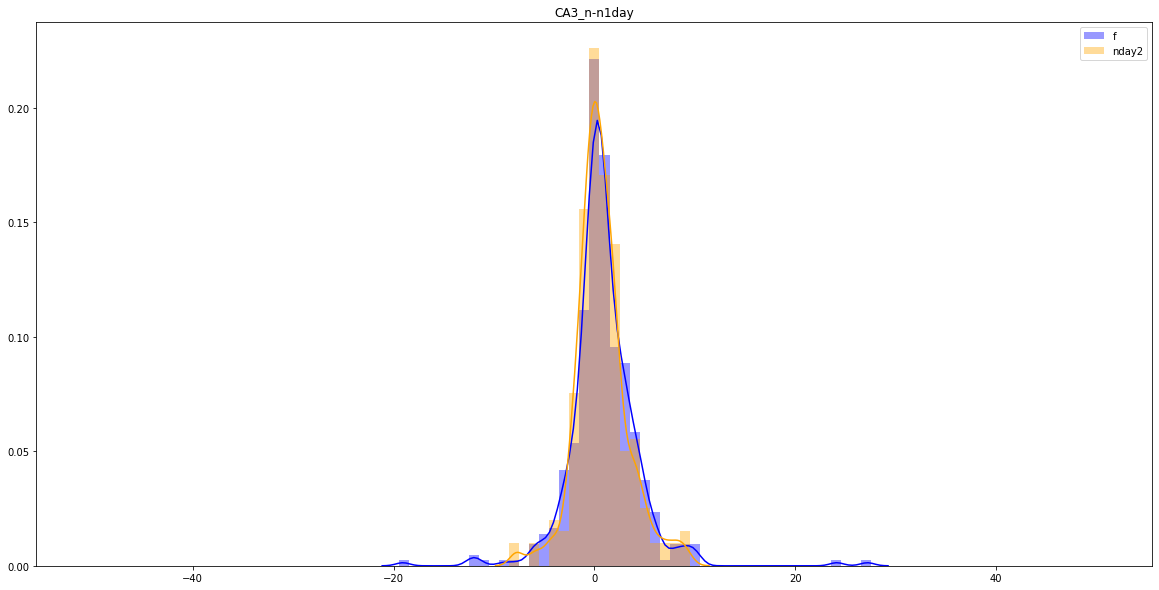

In [90]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA3_fn_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='f',color='blue')
ax = sns.distplot(CA3_2day_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='nday2',color='orange')
ax.legend()
ax.set_title('CA3_n-n1day')
print(stats.ks_2samp(CA3_fn_dist_data['total_n_act_shift'][0], CA3_2day_dist_data['total_f_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('n_mean=',np.mean(CA3_fn_dist_data['total_n_act_shift'][0]))
print('n_var=',np.var(CA3_fn_dist_data['total_n_act_shift'][0]))
print('n_skewness=',stats.skew(CA3_fn_dist_data['total_n_act_shift'][0]))
print('nday1_mean=',np.mean(CA3_2day_dist_data['total_f_act_shift'][0]))
print('ndayn_var=',np.var(CA3_2day_dist_data['total_f_act_shift'][0]))
print('nday1_skewness=',stats.skew(CA3_2day_dist_data['total_f_act_shift'][0]))

In [124]:
print(len(np.concatenate((CA3_2day_dist_data['total_n_act_shift'],CA3_fn_dist_data['total_n_act_shift']),axis=None)))
print(len(CA3_2day_dist_data['total_n_act_shift'][0]))
print(len(CA3_fn_dist_data['total_n_act_shift'][0]))

626
197
429


Ks_2sampResult(statistic=0.19201820409592157, pvalue=0.00041436794406857214)
f_mean= -0.07278944940991322
f_var= 1.3278281103781946
f_skewness= -0.7099098679162557
day2_mean= 0.41930381918830967
day2_var= 4.5136728573435825
day2_skewness= 0.45320364453636347


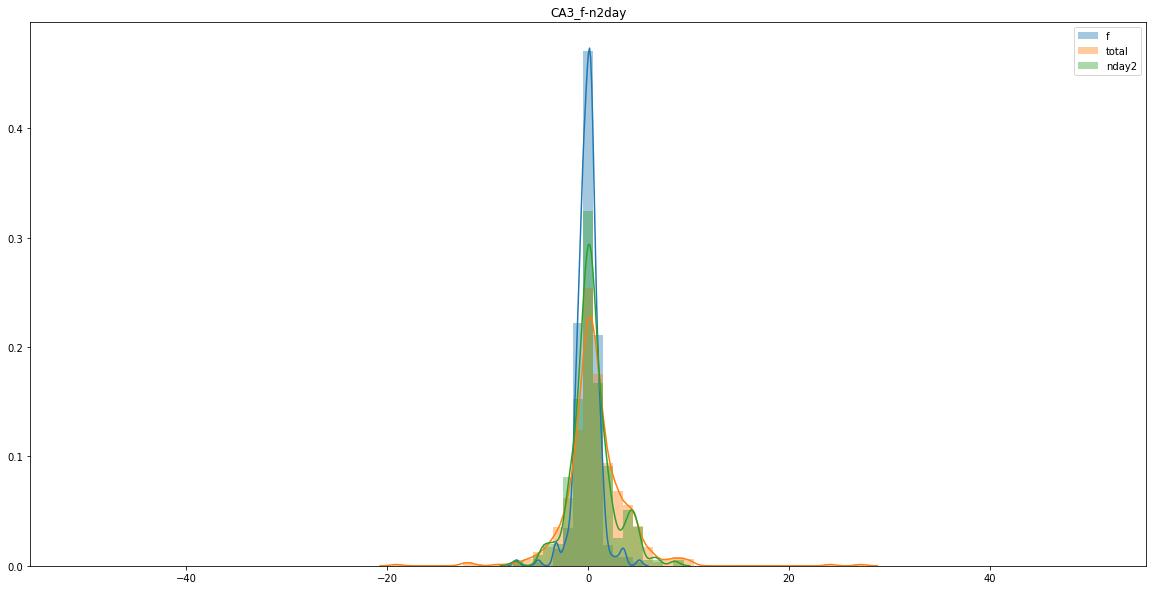

In [125]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA3_fn_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='f')
ax = sns.distplot(np.concatenate((CA3_2day_dist_data['total_n_act_shift'],CA3_fn_dist_data['total_n_act_shift']),axis=None),bins=distbins,norm_hist=True,label='total')
ax = sns.distplot(CA3_2day_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='nday2')
#ax = sns.distplot(CA3_fn_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='n')
ax.legend()
ax.set_title('CA3_f-n2day')
print(stats.ks_2samp(CA3_fn_dist_data['total_f_act_shift'][0], CA3_2day_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('f_mean=',np.mean(CA3_fn_dist_data['total_f_act_shift'][0]))
print('f_var=',np.var(CA3_fn_dist_data['total_f_act_shift'][0]))
print('f_skewness=',stats.skew(CA3_fn_dist_data['total_f_act_shift'][0]))
print('day2_mean=',np.mean(CA3_2day_dist_data['total_n_act_shift'][0]))
print('day2_var=',np.var(CA3_2day_dist_data['total_n_act_shift'][0]))
print('day2_skewness=',stats.skew(CA3_2day_dist_data['total_n_act_shift'][0]))

Ks_2sampResult(statistic=0.12567203131796434, pvalue=0.00039569832391828097)
f_mean= 0.7682279987885331
f_var= 4.761318586493556
f_skewness= 0.2454449448992192
day2_mean= 1.3075889921429649
day2_var= 4.744660673149237
day2_skewness= 1.3613410159505948


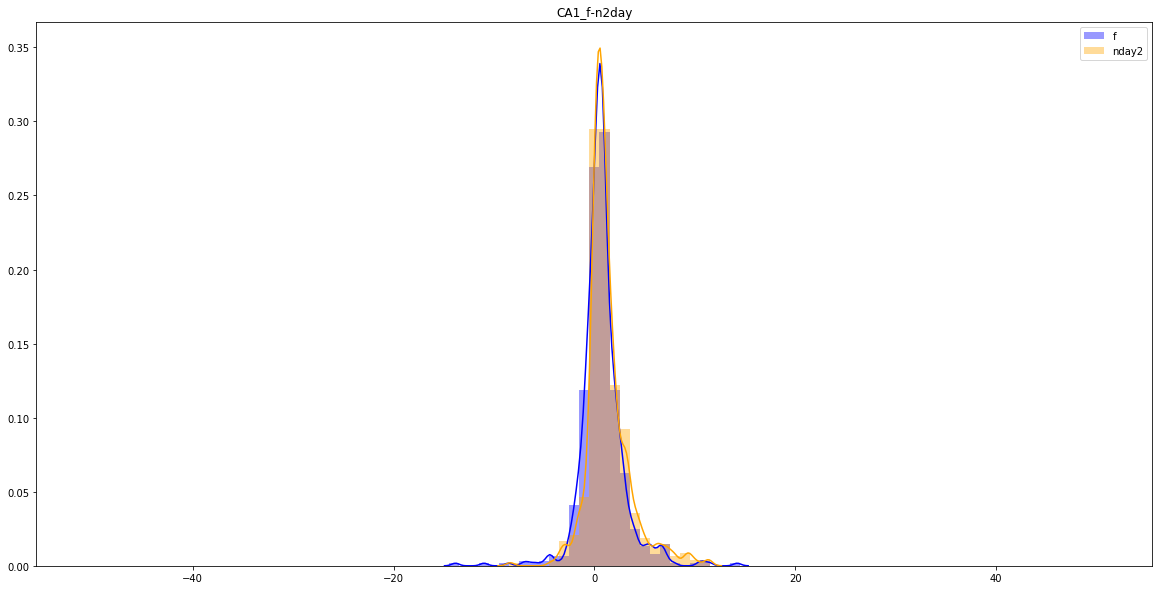

In [89]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA1_fn_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='f',color='blue')
ax = sns.distplot(CA1_2day_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='nday2',color='orange')
ax.legend()
ax.set_title('CA1_f-n2day')
print(stats.ks_2samp(CA1_fn_dist_data['total_f_act_shift'][0], CA1_2day_dist_data['total_n_act_shift'][0]))
#print('CA1_f',stats.kstest(CA1_fn_dist_data['total_f_act_shift'][0], 'norm'))
#print('CA1_n',stats.kstest(CA1_fn_dist_data['total_n_act_shift'][0], 'norm'))
print('f_mean=',np.mean(CA1_fn_dist_data['total_f_act_shift'][0]))
print('f_var=',np.var(CA1_fn_dist_data['total_f_act_shift'][0]))
print('f_skewness=',stats.skew(CA1_fn_dist_data['total_f_act_shift'][0]))
print('day2_mean=',np.mean(CA1_2day_dist_data['total_n_act_shift'][0]))
print('day2_var=',np.var(CA1_2day_dist_data['total_n_act_shift'][0]))
print('day2_skewness=',stats.skew(CA1_2day_dist_data['total_n_act_shift'][0]))

Ks_2sampResult(statistic=0.2314056963324616, pvalue=2.1048676868140603e-07)
CA1_mean= 1.7851663717653883
CA1_var= 9.463725863379018
CA1_skewness= 0.528348787389018
CA3_mean= 0.6861542231723795
CA3_var= 6.696039049563205
CA3_skewness= 0.38594541469780486


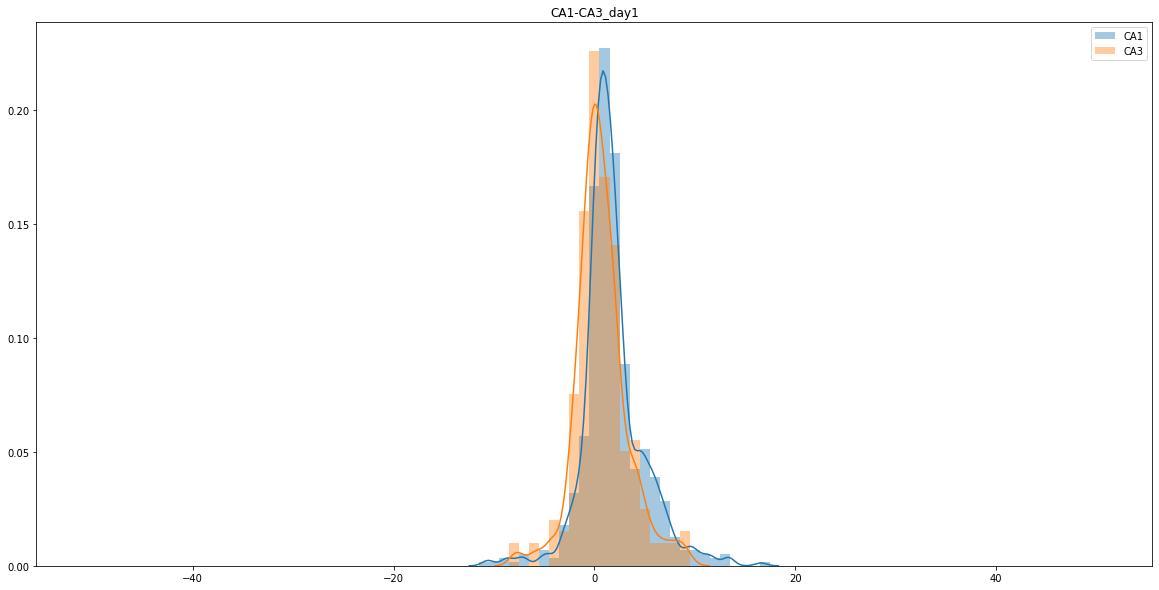

In [78]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA1_2day_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='CA1')
ax = sns.distplot(CA3_2day_dist_data['total_f_act_shift'][0],bins=distbins,norm_hist=True,label='CA3')
ax.legend()
ax.set_title('CA1-CA3_day1')
print(stats.ks_2samp(CA1_2day_dist_data['total_f_act_shift'][0], CA3_2day_dist_data['total_f_act_shift'][0]))
print('CA1_mean=',np.mean(CA1_2day_dist_data['total_f_act_shift'][0]))
print('CA1_var=',np.var(CA1_2day_dist_data['total_f_act_shift'][0]))
print('CA1_skewness=',stats.skew(CA1_2day_dist_data['total_f_act_shift'][0]))
print('CA3_mean=',np.mean(CA3_2day_dist_data['total_f_act_shift'][0]))
print('CA3_var=',np.var(CA3_2day_dist_data['total_f_act_shift'][0]))
print('CA3_skewness=',stats.skew(CA3_2day_dist_data['total_f_act_shift'][0]))

Ks_2sampResult(statistic=0.2608068394336094, pvalue=7.78484698926718e-09)
CA1_mean= 1.3075889921429649
CA1_var= 4.744660673149237
CA1_skewness= 1.3613410159505948
CA3_mean= 0.41930381918830967
CA3_var= 4.5136728573435825
CA3_skewness= 0.45320364453636347


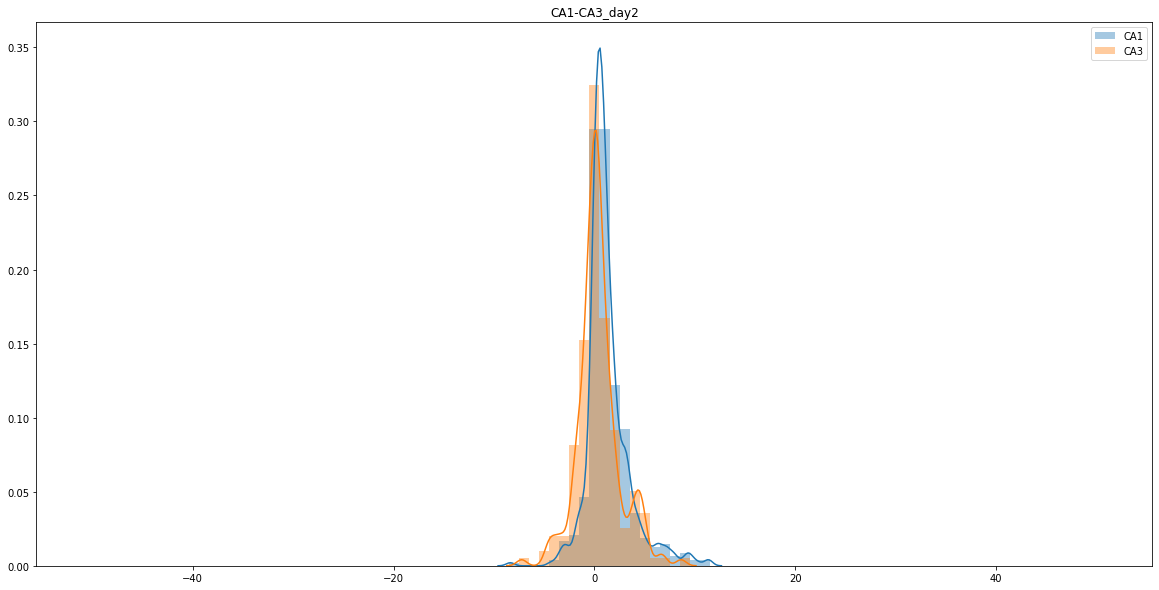

In [79]:
plt.figure(figsize=(20,10))
ax = sns.distplot(CA1_2day_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='CA1')
ax = sns.distplot(CA3_2day_dist_data['total_n_act_shift'][0],bins=distbins,norm_hist=True,label='CA3')
ax.legend()
ax.set_title('CA1-CA3_day2')
print(stats.ks_2samp(CA1_2day_dist_data['total_n_act_shift'][0], CA3_2day_dist_data['total_n_act_shift'][0]))
print('CA1_mean=',np.mean(CA1_2day_dist_data['total_n_act_shift'][0]))
print('CA1_var=',np.var(CA1_2day_dist_data['total_n_act_shift'][0]))
print('CA1_skewness=',stats.skew(CA1_2day_dist_data['total_n_act_shift'][0]))
print('CA3_mean=',np.mean(CA3_2day_dist_data['total_n_act_shift'][0]))
print('CA3_var=',np.var(CA3_2day_dist_data['total_n_act_shift'][0]))
print('CA3_skewness=',stats.skew(CA3_2day_dist_data['total_n_act_shift'][0]))

plt.figure(figsize=(20,10))
ax = sns.distplot(CA1_2day_dist_data['total_n_shift'][0],bins=distbins,norm_hist=True,label='CA1')
ax = sns.distplot(CA3_2day_dist_data['total_n_shift'][0],bins=distbins,norm_hist=True,label='CA3')
ax.legend()
ax.set_title('CA1-CA3_nday2')
stats.ks_2samp(CA1_2day_dist_data['total_n_shift'][0], CA3_2day_dist_data['total_n_shift'][0])

plt.figure(figsize=(20,10))
ax = sns.distplot(CA1_2day_dist_data['total_twoday_shift'][0],bins=distbins,norm_hist=True,label='CA1')
ax = sns.distplot(CA3_2day_dist_data['total_twoday_shift'][0],bins=distbins,norm_hist=True,label='CA3')
ax.legend()
ax.set_title('CA1-CA3_twaoday')
stats.ks_2samp(CA1_2day_dist_data['total_twoday_shift'][0], CA3_2day_dist_data['total_twoday_shift'][0])


stat, p = stats.normaltest(CA3_2day_dist_data['total_n_shift'][0])
print(p)
stat2, p2 = stats.shapiro(CA3_2day_dist_data['total_twoday_shift'][0])

print('towdayday2',stats.kstest(CA3_2day_dist_data['total_n_shift'][0], 'norm'))



# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    ax = sns.distplot(data)

In [115]:
# normalize the shift
# shuffle 100
# delay and instant PF specificly
# cdf
# shift and lap both by laps runs and by only has activity( start from the start of PF)